<a href="https://www.kaggle.com/code/yossefazam/eda-cleaning-ml-xgboost-randomfrost?scriptVersionId=128406384" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
df=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

## EDA

## what it is data talk ??? 
## houme prices in any country in usally in at home rooms and bedrooms 
 ## one of the important (housing_median_age) and nightboor and location of home ?? after that  area of home

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation (which measures how dispersed the values are). The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).
Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute . For example, you can see that slightly over 800 districts have a median_house_value equal to about $500,000.

In [8]:
# Knowing the highest price pertaining to each region ??
df.groupby('ocean_proximity')['median_house_value'].max()

ocean_proximity
<1H OCEAN     500001.0
INLAND        500001.0
ISLAND        450000.0
NEAR BAY      500001.0
NEAR OCEAN    500001.0
Name: median_house_value, dtype: float64

In [9]:
#Average household income in each region ???
df.groupby('ocean_proximity')['households'].mean()

ocean_proximity
<1H OCEAN     517.744965
INLAND        477.447565
ISLAND        276.600000
NEAR BAY      488.616157
NEAR OCEAN    501.244545
Name: households, dtype: float64

## Data cleaning 

In [10]:
(df.isnull().sum())/len(df)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

## data it consider cleaning i can modidfy in total_bedrooms using 

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
# drop nan values
df = df.dropna(axis = 0)


In [13]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Data visualization 

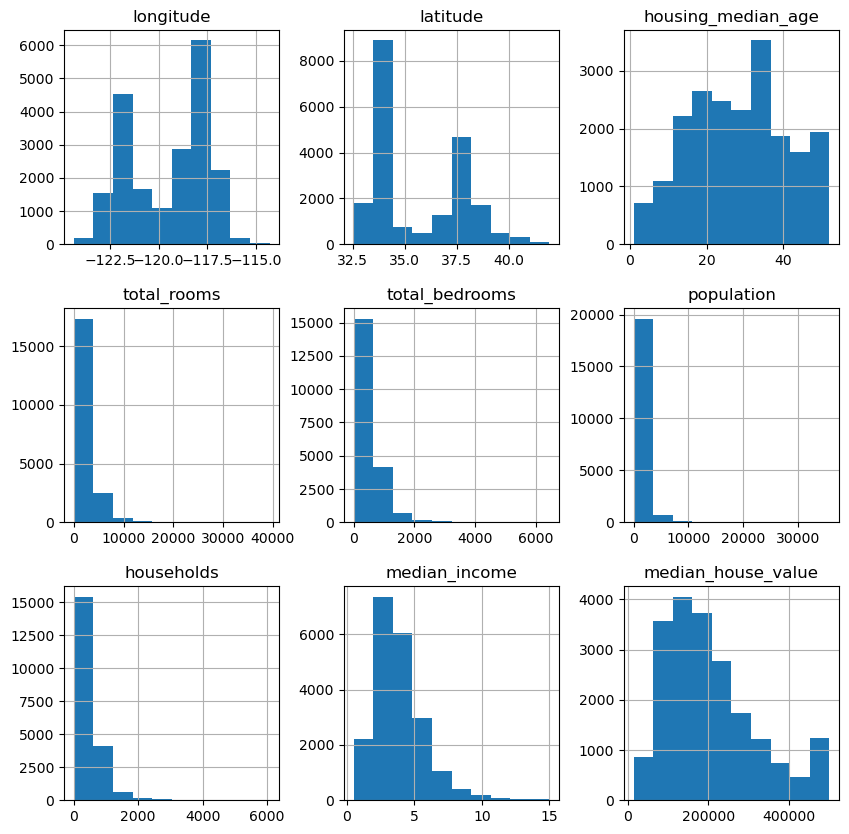

In [14]:
import matplotlib. pyplot as plt
df.hist(figsize=(10,10))
plt.show()

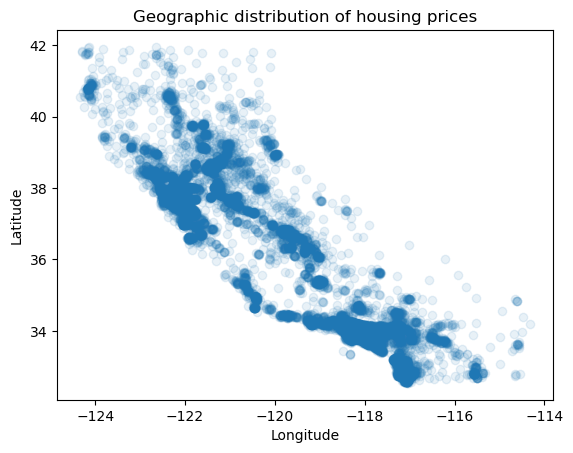

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Scatter plot of latitude and longitude
plt.scatter(df['longitude'], df['latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic distribution of housing prices')
plt.show()

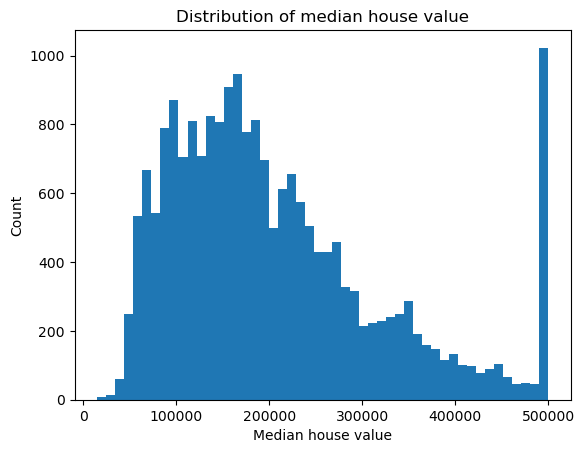

In [16]:
# Histogram of median house value
plt.hist(df['median_house_value'], bins=50)
plt.xlabel('Median house value')
plt.ylabel('Count')
plt.title('Distribution of median house value')
plt.show()

**this grahf it continus a outliers **

In [17]:
# # Calculate the interquartile range (IQR)
# Q1 = df['median_house_value'].quantile(0.25)
# Q3 = df['median_house_value'].quantile(0.75)
# IQR = Q3 - Q1

# # Remove the outliers from the DataFrame
# df['median_house_value'] = df['median_house_value'][~((df['median_house_value'] < (Q1 - 1.5 * IQR)) | (df['median_house_value'] > (Q3 + 1.5 * IQR)))]

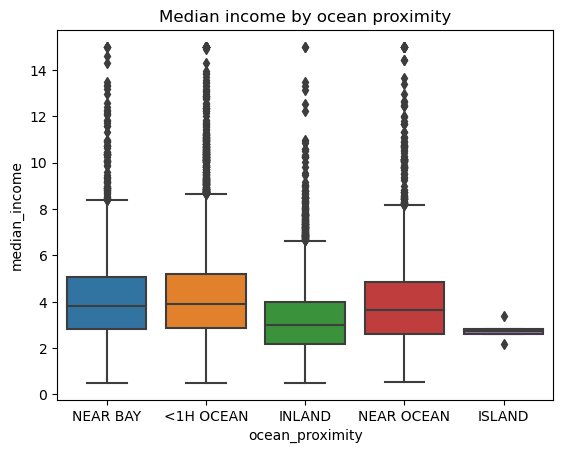

In [18]:
# Box plot of median income by ocean proximity
sns.boxplot(x='ocean_proximity', y='median_income', data=df)
plt.title('Median income by ocean proximity')
plt.show()

In [19]:
import plotly.express as px
import pandas as pd



# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=600)

# Update the map style
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()


## future engineering

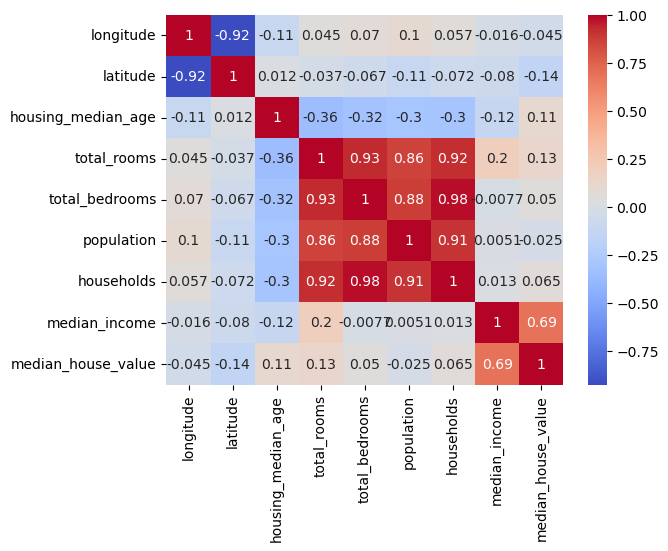

In [20]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

Model

In [22]:
df = pd.get_dummies(df, columns = ["ocean_proximity"], drop_first = True)

In [23]:
y = df[["median_house_value"]]
X = df.drop(["median_house_value"], axis = 1)

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing  import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
RS = 123
TS = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = TS, random_state = RS)

In [26]:
forest_model = RandomForestRegressor()

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Train and evaluate each model
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
y_pred1 = forest_model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred1)
print(f"{forest_model.__class__.__name__} MSE: {mse:.2f}")

RandomForestRegressor MSE: 2327454866.11


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)

print("R2 score with random frost:", r2)

R2 score with random frost: 0.8184772993793862


## Xgboost

In [31]:
import xgboost as xgb

In [32]:
# Define the parameters for the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=1000, 
                             learning_rate=0.1,
                             max_depth=10, 
                             gamma=1, 
                             subsample=0.8, 
                             colsample_bytree=0.8, 
                             seed=8)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

import warnings
warnings.filterwarnings('ignore')

MSE: 1938017934.0971956


In [35]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.8488502379266705


In [34]:
from sklearn.model_selection import cross_val_score, KFold
# Define your cross-validation parameters
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

# Perform cross-validation
scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print('Cross-validation scores: ', np.sqrt(-scores))

Cross-validation scores:  [44985.9834873  45034.98774739 46088.43325826 43405.33956682
 46353.41281561 44041.85125352]


## Thanks